<a href="https://colab.research.google.com/github/maimonahST/Signal_It/blob/main/v1.0.0/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install --upgrade shap tensorflow

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten, GRU, SimpleRNN, LSTM, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf=GroupKFold()
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)

In [ ]:
def two_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  return X_train, X_test, y_train, y_test, train_groups

## ML


will explain the best model in ML, which is

In [ ]:
X_ica  = np.load('/content/drive/MyDrive/GP/GP-Data/X_ica2.npy')
y_ica = np.load('/content/drive/MyDrive/GP/GP-Data/y_ica2.npy')
y_ica = y_ica.astype('int')

X_ica.shape, y_ica.shape

((45, 32, 32), (45,))

In [ ]:
np.unique(y_ica)

array([0, 1, 2])

In [ ]:
# Load your dataset and split into training and testing sets
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_ica, y_ica, test_size=0.2, random_state=101)


y_train_ica[y_train_ica==0] = 1 #Stroke
y_train_ica[y_train_ica==2] = 0 #Healthy

y_test_ica[y_test_ica==0] = 1 #Stroke
y_test_ica[y_test_ica==2] = 0 #Healthy


np.unique(y_train_ica), np.unique(y_test_ica)


(array([0, 1]), array([0, 1]))

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler3D()
X_train_ica = scaler.fit_transform(X_train_ica)
X_test_ica = scaler.transform(X_test_ica)

# Flatten the data array for ML models
X_train_ica = X_train_ica.reshape(X_train_ica.shape[0], -1)
X_test_ica = X_test_ica.reshape(X_test_ica.shape[0], -1)
y_train_ica = y_train_ica.reshape(y_train_ica.shape[0], -1)
y_test_ica = y_test_ica.reshape(y_test_ica.shape[0], -1)


In [ ]:
xgboost = XGBClassifier(max_depth=9, n_estimators=200, learning_rate=0.01)
xgboost.fit(X_train_ica, y_train_ica)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import shap
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# # Set random seed for reproducibility
# np.random.seed(10)

# # Get a random sample of indices
# sample_indices = np.random.choice(len(X_train_ica), size=100, replace=False)

# # Use the sampled indices to select elements from X_train_ica
# X_sampled = X_train_ica[sample_indices]
X_sampled = X_train_ica


In [ ]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X_sampled)

In [ ]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled[0])

In [ ]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train_ica)

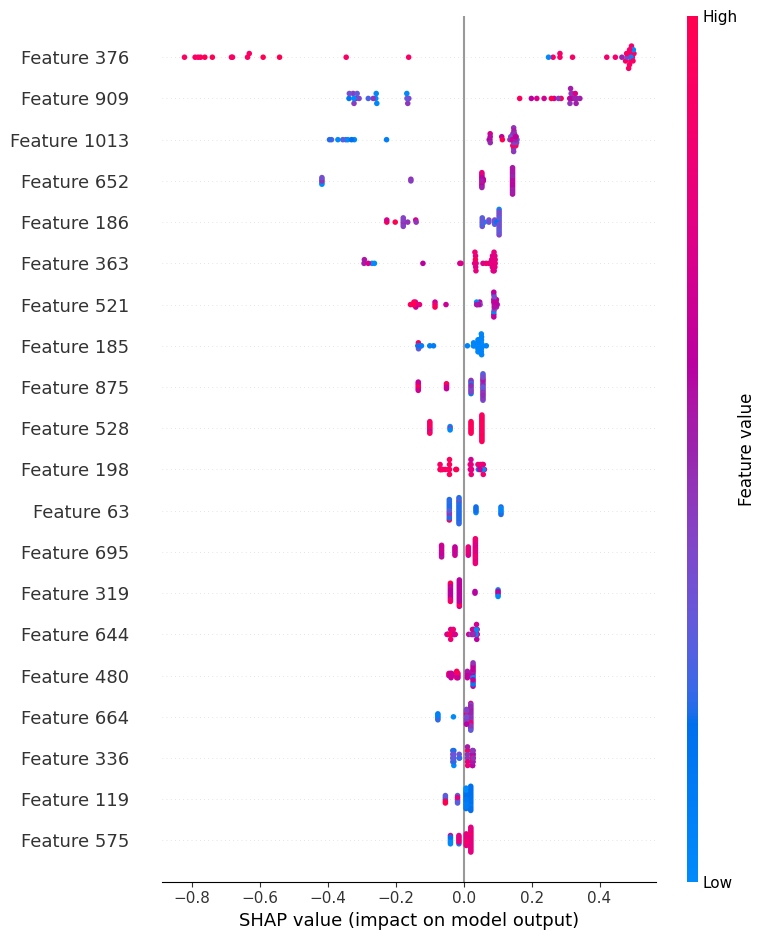

In [ ]:
shap.summary_plot(shap_values, X_train_ica)

## DL

In [ ]:
data_array = np.load('/content/drive/MyDrive/GP/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP/GP-Data/group_array.npy')



print(data_array.shape,label_array.shape,group_array.shape)

(7150, 1250, 33) (7150,) (7150,)


In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf=GroupKFold()
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)


def three_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      train_features, train_label = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      train_features=scaler.fit_transform(train_features)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  # Split train_features into train and val
  for train_index, val_index in gkf.split(train_features, train_label, groups= train_groups):
      X_train, y_train =train_features[train_index],train_label[train_index]
      X_val, y_val =train_features[val_index],train_label[val_index]

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[val_index])}")

      break

  return X_train, X_val, X_test, y_train, y_val, y_test




def two_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  return X_train, X_test, y_train, y_test


X_train, X_val, X_test, y_train, y_val, y_test = three_splits(data_array , label_array, group_array)

#X_train, X_test, y_train, y_test = two_splits(data_array , label_array, group_array)

# convert the problem from multiclass classification to binary classification
# make haemorrhage and schaemia classes as one

y_train[y_train==0] = 1
y_train[y_train==2] = 0

y_val[y_val==0] = 1
y_val[y_val==2] = 0

y_test[y_test==0] = 1
y_test[y_test==2] = 0

group=[ 0  1  2  3  4  6  7  8 10 11 13 15 16 17 18 19 20 22 23 24 25 26 27 28
 29 30 31 32 33 34 36 37 39 41 42 43 44 46 47]
group=[ 5  9 12 14 21 35 38 40 45]
group=[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
group=[ 4  6  7 16 17 20 21 23 24 26 27 33 34]


In [ ]:
# print the percentages of data split (3)

print("Train size:", len(X_train) / len(data_array) * 100, "%")
print("Validation size:", len(X_val) / len(data_array) * 100, "%")
print("Test size:", len(X_test) / len(data_array) * 100, "%")

Train size: 66.12587412587413 %
Validation size: 14.53146853146853 %
Test size: 19.342657342657343 %


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#resource:https://github.com/dll-ncai/eeg_pre-diagnostic_screening/blob/master/code/chrononet/chrono.py

def block(input):

  """
    Create a block consisting of three parallel convolutional layers followed by concatenation.

    Parameters:
    - input: Input tensor.

    Returns:
    - Concatenated tensor resulting from the parallel convolutional layers.
    """

  conv1 = Conv1D(32, 2, strides=2,activation='relu',padding="same")(input)
  conv2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(input)
  conv3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(input)
  x = concatenate([conv1,conv2,conv3],axis=2)
  return x

# Define the input layer with a shape of (1250, 33)
input = Input(shape=(1250, 33))

# Create the first block
block1 = block(input)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

gru_out1 = GRU(32,activation='tanh',return_sequences=True)(block3)
gru_out2 = GRU(32,activation='tanh',return_sequences=True)(gru_out1)
gru_out = concatenate([gru_out1,gru_out2],axis=2)
gru_out3 = GRU(32,activation='tanh',return_sequences=True)(gru_out)
gru_out = concatenate([gru_out1,gru_out2,gru_out3])
gru_out4 = GRU(32,activation='tanh')(gru_out)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(gru_out4)

# Define the model with 'input' as the input and 'predictions' as the output
model = Model(inputs=input, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(X_train, y_train, epochs=70, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.6255 - loss: 0.6601 - val_accuracy: 0.6246 - val_loss: 0.6363
Epoch 2/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7397 - loss: 0.5021 - val_accuracy: 0.6978 - val_loss: 0.5611
Epoch 3/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8855 - loss: 0.2628 - val_accuracy: 0.7324 - val_loss: 0.6442
Epoch 4/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9678 - loss: 0.0853 - val_accuracy: 0.7690 - val_loss: 0.7430
Epoch 5/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.7228 - val_loss: 0.8649
Epoch 6/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9800 - loss: 0.0475 - val_accuracy: 0.7729 - val_loss: 1.1812
Epoch 7/70
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9817 - loss: 0.0519 - val_accuracy: 0.7469 - val_loss: 1.0233


Average Confusion Matrix:
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


<Figure size 800x600 with 0 Axes>

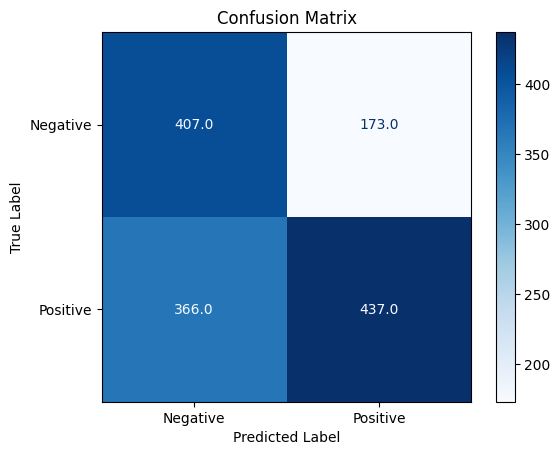

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       580
           1       0.72      0.54      0.62       803

    accuracy                           0.61      1383
   macro avg       0.62      0.62      0.61      1383
weighted avg       0.64      0.61      0.61      1383



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

print("Average Confusion Matrix:")

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test.ravel(), y_pred.ravel())

# Print the report
print(report)

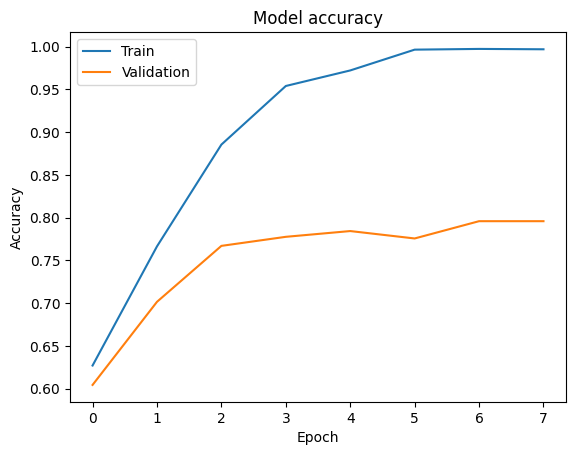

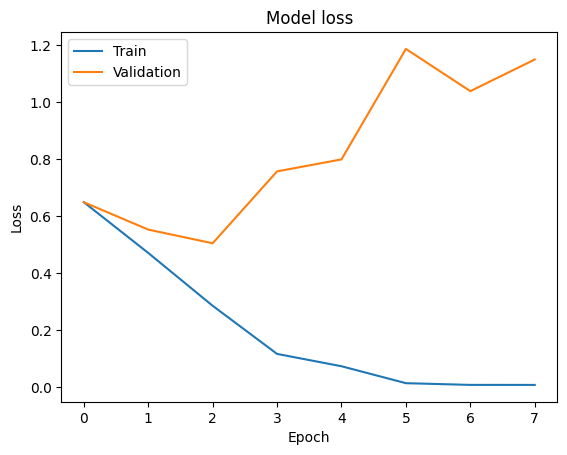

In [ ]:
# plot model accuracy and loss of training and validation

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
X_test.shape

(1383, 1250, 33)

### Explainer


In [ ]:
import shap
shap.initjs()


# Create a KernelExplainer instance
explainer = shap.KernelExplainer(model, X_train)

# Explain individual predictions
explainer.explain_row(
    X_test[0], max_evals=50,
    main_effects=True,
    error_bounds="shap",  # Choose error bound method
    outputs=1,  # Specify output index if applicable (multi-output models)
    silent=False  # Set to True to suppress status messages
)

# Visualize explanations using row_values
shap.force_plot(explainer.expected_value, X_test[100] )

In [ ]:
import shap
shap.initjs()
# Create a KernelExplainer instance
# explainer = shap.KernelExplainer(model, X_train)

# Explain individual predictions
explainer.explain(
    X_test[700], max_evals=50,
    main_effects=True,
    error_bounds="shap",  # Choose error bound method
    outputs=1,  # Specify output index if applicable (multi-output models)
    silent=False  # Set to True to suppress status messages
)

# Visualize explanations using row_values
shap.force_plot(explainer.expected_value, X_test[700] )

NameError: name 'explainer' is not defined

In [ ]:
import shap
shap.initjs()

# Visualize explanations using row_values
shap.force_plot(explainer.expected_value, X_test[500] )

In [ ]:

# The shap.force_plot function generates a visualization of the Shapley values for a single prediction.
# The plot shows the contribution of each feature to the predicted outcome, as well as the overall prediction.
# The color of each bar indicates the magnitude of the contribution, with red indicating a positive contribution and blue indicating a negative contribution.
# The size of each bar indicates the relative importance of the feature.
# The plot also includes a vertical line indicating the predicted outcome without the feature, and a horizontal line indicating the overall prediction.

# In the context of the given code, the shap.force_plot function is used to visualize the Shapley values for the first 50 predictions of the model.
# This can be useful for understanding which features are most important for the model's predictions, and how they contribute to the overall outcome.